<a href="https://colab.research.google.com/github/Gilmaralexandre/Python-DIO/blob/main/An%C3%A1lise_de_Dados_DIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de dados com Pandas Dio


- Objetivo é realizar uma análise exploratória dos dados, obtida pelo arquivo csv, "Adveture Works".
- Nesta análise o foco é reaizar uma análise e tentar descobrir insights interessantes no conjunto de dados.
- Posteriormente será realizada a manipulação a fim de criar boas features (variaveis para treinamento de um modelo), e por fim o treinamento do modelo e a performance do mesmo observado com metricas de performance.

### Conhecendo o conjunto de dados

#### Primeiras impressões

- Trata-se de uma base de dados referente a vendas realizadas dentro de um período de 2 anos (2008 e 2009), informações de Id da loja, produto e cliente, e demais informações como marca, fabricante, preço unitário, preço e custo unitário, valor de venda entre outras

In [ ]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn")

In [ ]:
# Importando o dataset com o uso da função pd.read_excel
df = pd.read_excel("/content/drive/MyDrive/datasets/AdventureWorks.xlsx")

In [ ]:
# Utilizando o head() para visualizar as 5 primeiras linhas, caso o objetivo fosse visualizar as ultimas, poderiamos usar o tail()
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


# Análise Explorátoria de Dados

#                      
## Definições Iniciais 

- Com o intuito de ter um conhecimento mais elaborado sobre o conjunto de dados, e como atuar em cada variavel, vou utilizar um dicionário de dados, que vai estruturar a variavel, o tipo e a descrição no formato de matriz.

In [ ]:
# Criando dicionário de dados
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [ ]:
dicionário = {
    'Data Venda':["Datetime", "Data"],
    'Data Envio':["Datetime", "Data"],
    'ID Loja':["Inteiro", "Qualitativa Nominal"],
    'ID Produto':["Inteiro", "Qualitativa Nominal"],
    'ID Cliente':["Inteiro", "Qualitativa Nominal"],
    'No. Venda':["Inteiro", "Qualitativa Nominal"],
    'Custo Unitário':["Ponto Flutuante", "Quantitativa Continua"],
    'Preço Unitário':["Ponto Flutuante", "Quantitativa Continua"],
    'Quantidade':["Inteiro", "Quantitativa Discreta"],
    'Valor Desconto':["Ponto Flutuante", "Quantitativa Continua"],
    'Valor Venda':["Ponto Flutuante", "Quantitativa Continua"],
    'Produto':["String", "Quanlitativa Nominal"],
    'Fabricante':["String", "Quanlitativa Ordinal"],
    'Marca':["String", "Quanlitativa Ordinal"],
    'Classe':["String", "Quanlitativa Ordinal"],
    'Cor':["String", "Quanlitativa Nominal"]
}


In [ ]:
def DataFrame(dicio):
    dados = {   
        'Variavel' : [x for x in dicionário], #Chaves do dicionário
        'Tipo' : [x[0] for x in dicionário.values()], #Elemento 0 da lista
        'Descrição' : [x[1] for x in dicionário.values()] #Elemento 1 da lista
            }
 
    df = pd.DataFrame(data = dados)
                    
    return df

In [ ]:
Dicionário_de_Dados = DataFrame(dicionário)
Dicionário_de_Dados

,Variavel,Tipo,Descrição
0,Data Venda,Datetime,Data
1,Data Envio,Datetime,Data
2,ID Loja,Inteiro,Qualitativa Nominal
3,ID Produto,Inteiro,Qualitativa Nominal
4,ID Cliente,Inteiro,Qualitativa Nominal
5,No. Venda,Inteiro,Qualitativa Nominal
6,Custo Unitário,Ponto Flutuante,Quantitativa Continua
7,Preço Unitário,Ponto Flutuante,Quantitativa Continua
8,Quantidade,Inteiro,Quantitativa Discreta
9,Valor Desconto,Ponto Flutuante,Quantitativa Continua


In [ ]:
# Dataset não possui valores faltantes
df is df.isnull()

False

In [ ]:
# Qual a receita total?
df["Valor Venda"].sum()

5984606.1426

In [ ]:
# Produtos mais vendidos
print("Produtos mais vendidos")
print(df.Produto.value_counts().head(3))
print('*'*30)
print("Produtos menos vendidos")
print(df.Produto.value_counts().tail(3))

Produtos mais vendidos
Adventure Works Laptop15.4W M1548 Black      123
Fabrikam Trendsetter 2/3'' 17mm X100 Grey    118
Adventure Works Laptop15.4W M1548 Red        115
Name: Produto, dtype: int64
******************************
Produtos menos vendidos
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black        89
Headphone Adapter for Contoso Phone E130 Silver    87
Headphone Adapter for Contoso Phone E130 White     85
Name: Produto, dtype: int64


In [ ]:
custo_unit = df["Custo Unitário"].sum()
preço_unit = df["Preço Unitário"].sum()
lucro_por_peça = preço_unit - custo_unit

print("O custo unitario de produtos foi de {} dolares, sendo que o preço unitario foi de {} dolares, concluimos que o lucro retirado neste sentido foi de {} dolares".format(custo_unit, preço_unit, lucro_por_peça))

O custo unitario de produtos foi de 245893.55999999997 dolares, sendo que o preço unitario foi de 671245.28 dolares, concluimos que o lucro retirado neste sentido foi de 425351.7200000001 dolares


In [ ]:
# Uma forma de visualizar os tipos das variaveis, valores nulos é utilizando a função df.info
# Tipos inicialmente estão corretos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Data Venda      904 non-null    datetime64[ns]
 1   Data Envio      904 non-null    datetime64[ns]
 2   ID Loja         904 non-null    int64         
 3   ID Produto      904 non-null    int64         
 4   ID Cliente      904 non-null    int64         
 5   No. Venda       904 non-null    object        
 6   Custo Unitário  904 non-null    float64       
 7   Preço Unitário  904 non-null    float64       
 8   Quantidade      904 non-null    int64         
 9   Valor Desconto  904 non-null    float64       
 10  Valor Venda     904 non-null    float64       
 11  Produto         904 non-null    object        
 12  Fabricante      904 non-null    object        
 13  Marca           904 non-null    object        
 14  Classe          904 non-null    object        
 15  Cor   

In [ ]:
# O describe() traz informações estastiticas do conjunto de dados 
# O describe traz informações como contagem, média, desvio padrao, minimo, maximo, e os quartis de 25, 50, 75 por cento dos valores

df.describe()

,ID Loja,ID Produto,ID Cliente,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda
count,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000
mean,270.015487,1225.238938,19029.092920,272.006150,742.527965,62.950221,689.123294,6620.139538
std,50.955280,706.698742,96.427655,129.765051,368.589889,148.945964,822.363117,4319.407257
min,199.000000,366.000000,18815.000000,5.090000,9.990000,2.000000,0.000000,159.840000
25%,199.000000,384.000000,18964.750000,324.690000,758.000000,6.000000,0.000000,3920.000000
50%,306.000000,1202.000000,19060.000000,330.660000,980.000000,9.000000,461.166000,5798.700000
75%,307.000000,1226.000000,19107.000000,348.580000,998.000000,17.000000,1005.075000,7986.000000
max,307.000000,2497.000000,19145.000000,348.580000,999.000000,1560.000000,6272.000000,29400.000000


In [ ]:
inicio = pd.to_datetime(df['Data Venda']).dt.date.min()
fim = pd.to_datetime(df['Data Venda']).dt.date.max()

print("O inicio das vendas ocorreu no dia {}, e a data dinal das vendas ocorreu no dia {}.".format(inicio, fim))

O inicio das vendas ocorreu no dia 2008-01-02, e a data dinal das vendas ocorreu no dia 2009-12-31.


In [ ]:
df.groupby(['Produto']).agg('Quantidade').sum() #Produto e a quantidade vendida

# Headphone teve uma venda expressiva

Produto
Adventure Works Laptop15.4W M1548 Black             1089
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Name: Quantidade, dtype: int64

In [ ]:
df.groupby(['Preço Unitário']).agg('Produto').sum() #Preço Unitário e Produto

# Headphone tem o menor preço e maior quantidade de venda

Preço Unitário
9.99      Headphone Adapter for Contoso Phone E130 Silve...
758.00    Adventure Works Laptop15.4W M1548 RedAdventure...
980.00    Fabrikam Trendsetter 2/3'' 17mm X100 GreyFabri...
998.00    Fabrikam Trendsetter 1/3'' 8.5mm X200 WhiteFab...
999.00    Fabrikam Trendsetter 1/3'' 8.5mm X200 BlackFab...
Name: Produto, dtype: object

In [ ]:
# Desconto dos produtos
df.groupby(['Produto']).agg('Valor Desconto').sum() #Produto e valor de venda

Produto
Adventure Works Laptop15.4W M1548 Black             78672.8200
Adventure Works Laptop15.4W M1548 Red               83812.0600
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black         83306.6100
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey          61975.8000
Fabrikam Trendsetter 1/3'' 8.5mm X200 White         73392.9200
Fabrikam Trendsetter 2/3'' 17mm X100 Black          86083.2000
Fabrikam Trendsetter 2/3'' 17mm X100 Grey          104223.0000
Headphone Adapter for Contoso Phone E130 Silver     25476.2982
Headphone Adapter for Contoso Phone E130 White      26024.7492
Name: Valor Desconto, dtype: float64

In [ ]:
df['Ano'] = df['Data Venda'].dt.year
df['Mes'] = df['Data Venda'].dt.month

In [ ]:
df.groupby(['Ano']).agg('Custo Unitário').sum() #Custo unitário no ano

Ano
2008    130164.53
2009    115729.03
Name: Custo Unitário, dtype: float64

In [ ]:
df.groupby(['Ano']).agg('Valor Desconto').sum() #Desconto aplicado no ano

Ano
2008    292434.0190
2009    330533.4384
Name: Valor Desconto, dtype: float64

In [ ]:
df.groupby(['Ano']).agg('Valor Venda').sum() #Valor de venda no ano

Ano
2008    3.187608e+06
2009    2.796998e+06
Name: Valor Venda, dtype: float64

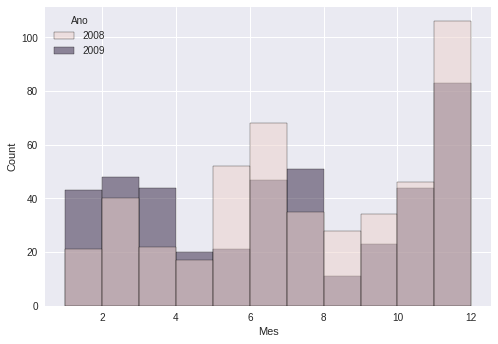

In [ ]:
sns.histplot(data=df, x="Mes", hue="Ano") # Histograma da quantidade de vendas pelo mes e ano

Ano
2008    3.057443e+06
2009    2.681269e+06
Name: Lucro, dtype: float64


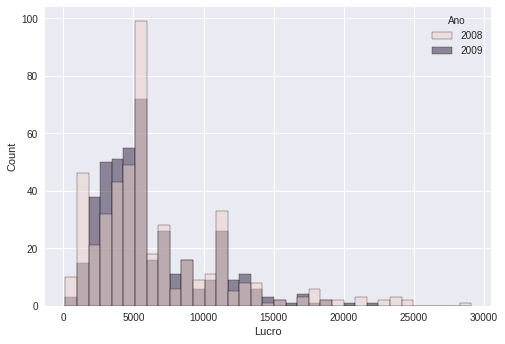

In [ ]:
print(df.groupby('Ano').agg('Lucro').sum())
sns.histplot(data=df, x="Lucro", hue="Ano") #Histograma do lucro obtido nos anos de análise

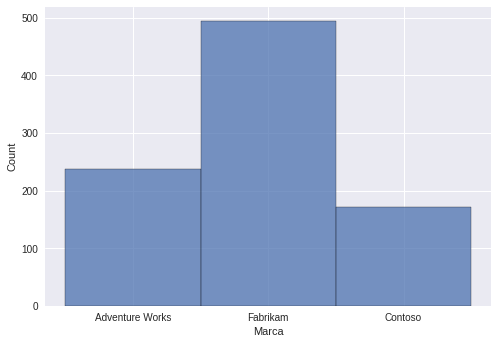

In [ ]:
sns.histplot(data=df, x="Marca")

- Com os plots acima podemos analisar que os anos tem uma quantidade de vendas similar, com alguns pontos de divergencia.

- O lucro segue um distribuição no histograma similar, sendo que o ano de 2009 teve uma queda no lucro.

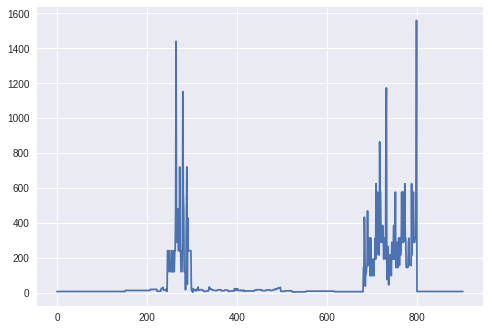

In [ ]:
df.Quantidade.plot() # Demonstra valores bem atipicos, pode ser um insight?

#### Uma observação sobre os dados estastistico, a coluna quantidade informa valores muitos discrepantes entre a media e a mediana, podendo ser algum informação relevante



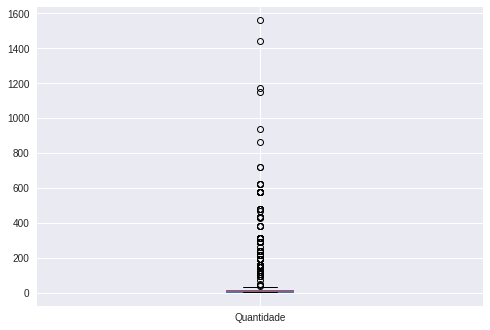

In [ ]:
df.boxplot('Quantidade')

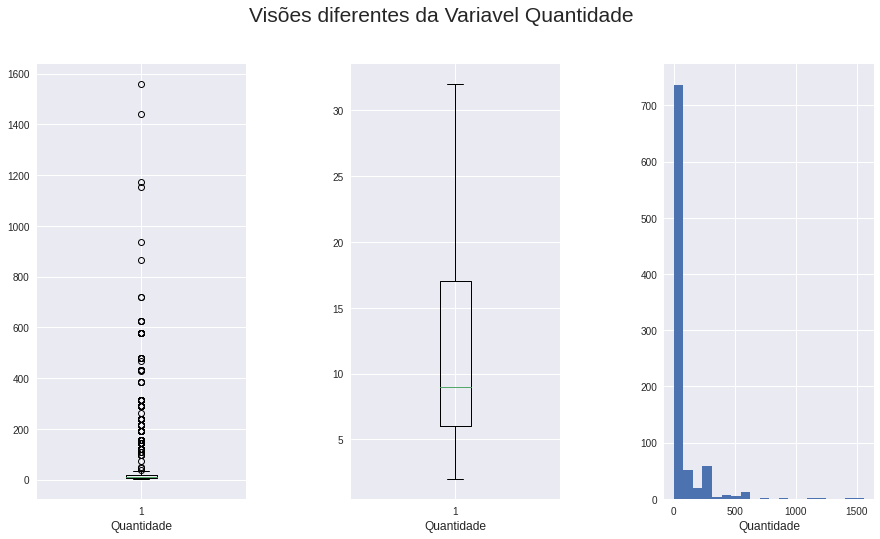

In [ ]:
# Vários gráficos numa mesma imagem:

fig = plt.figure(figsize=(15,8)) #tamanho do frame 
plt.subplots_adjust(wspace= 0.5) #espaço entre os graficos
plt.suptitle('Visões diferentes da Variavel Quantidade', fontsize = (21)) #titulo da visão geral (não é o título de cada gráfico)
plt.subplot(1,3,1) #posição do primeiro gráfico (1 linha, 3 colunas, posição 1 )
plt.boxplot(df.Quantidade, meanline = True) #Boxplot normal
plt.xlabel('Quantidade', {'fontsize': 12}) #legenda no eixo x
plt.subplot(1,3,2)
plt.boxplot(df.Quantidade, showfliers=False) #Boxplot sem os outliers
plt.xlabel('Quantidade', {'fontsize': 12})
plt.subplot(1,3,3)
plt.hist(df.Quantidade, bins = 20) #Histograma
plt.xlabel('Quantidade', {'fontsize': 12})
plt.show()

#### Conforme observação acima a variavel possui muitos valores discrepantes, como podemos visualizar no grafico que demonstram  valores elevados e no segundo grafico demonstra varios outliers(valores discrepantes)

#### A análise dessa variavel é que a distribuição demonstra que nesse contexto acontece mais venda com valor inferior e poucas vendas de alto valor. Neste cenário vou realizar a análise sem os valores atipicos por não demostrar a mediana dos casos, essa ação poderia causar uma análise pouco representativa e não conseguiria generalizar em dados de teste ou em diferentes cenários. 

In [ ]:
# Correlação da variavel Quantidade, demonstra valores altos de correlação negativa com as variaveis df[Custo Unitario] e  df[Preço Unitario]
df.corr()['Quantidade']

ID Loja          -0.011730
ID Produto        0.651302
ID Cliente        0.084098
Custo Unitário   -0.744408
Preço Unitário   -0.719066
Quantidade        1.000000
Valor Desconto   -0.081035
Valor Venda      -0.173476
Ano               0.168231
Mes               0.128618
Lucro            -0.153055
Name: Quantidade, dtype: float64

In [ ]:
#Função que calcula todos os componentes do boxplot e assim é possível identificar os outliers a partir do LS e LI.

#vejam que o 1.5 é um parâmetro. Esse valor pode ser alterado por você de acordo com seu estudo. Só esteja ciente que 
#sempre que mudar esse valor, mudamos a quantidade de outliers detectada.

def detecta_outlier(x, limite = 1.5): #Parametros x seria a coluna, e o limite é padrão da biblioteca mas pode ser alterado conforme necessidade
    dq = np.percentile(x, 75) - np.percentile(x, 25) #Criamos a variavel dq, que com a função do numpy np.percentile() pega a porcentagem de um valor. no caso queremos entre 25% e 75% dos valores
    limite_inf = np.maximum(np.percentile(x, 25) - limite * dq, np.min(x))
    limite_sup = np.minimum(np.percentile(x, 75) + limite * dq, np.max(x))
    print("Limite inferior:", limite_inf)
    print("Limite superior:", limite_sup)
    return np.where((x < limite_inf) | (x > limite_sup), 1, 0) #Retorna os limites

In [ ]:
outliers = detecta_outlier(df.Quantidade)

Limite inferior: 2.0
Limite superior: 33.5


In [ ]:
df['outlier_Quantidade'] = detecta_outlier(df.Quantidade)

Limite inferior: 2.0
Limite superior: 33.5


In [ ]:
# Com esta função abaixo, vai ser a 
dados_filtrados = df
dados_filtrados = dados_filtrados[dados_filtrados['outlier_Quantidade']==0]
dados_filtrados.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Ano,Mes,Lucro,outlier_Quantidade
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2008,5,4199.42,0
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2008,5,4199.42,0
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2008,5,4199.42,0
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2008,5,4199.42,0
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2008,6,4199.42,0


In [ ]:
Quantitativas = Dicionário_de_Dados[Dicionário_de_Dados['Descrição']=='Quantitativa Continua']
Quantitativas

,Variavel,Tipo,Descrição
6,Custo Unitário,Ponto Flutuante,Quantitativa Continua
7,Preço Unitário,Ponto Flutuante,Quantitativa Continua
9,Valor Desconto,Ponto Flutuante,Quantitativa Continua
10,Valor Venda,Ponto Flutuante,Quantitativa Continua


In [ ]:
correlação = df[['Custo Unitário', 'Preço Unitário', 'Valor Desconto', 'Valor Venda', 'Quantidade', 'Lucro']]

                Custo Unitário  Preço Unitário  Valor Desconto  Valor Venda  \
Custo Unitário        1.000000        0.944208        0.223897     0.434880   
Preço Unitário        0.944208        1.000000        0.240868     0.489014   
Valor Desconto        0.223897        0.240868        1.000000     0.417466   
Valor Venda           0.434880        0.489014        0.417466     1.000000   
Quantidade           -0.744408       -0.719066       -0.081035    -0.173476   
Lucro                 0.410043        0.466570        0.416021     0.999625   

                Quantidade     Lucro  
Custo Unitário   -0.744408  0.410043  
Preço Unitário   -0.719066  0.466570  
Valor Desconto   -0.081035  0.416021  
Valor Venda      -0.173476  0.999625  
Quantidade        1.000000 -0.153055  
Lucro            -0.153055  1.000000  


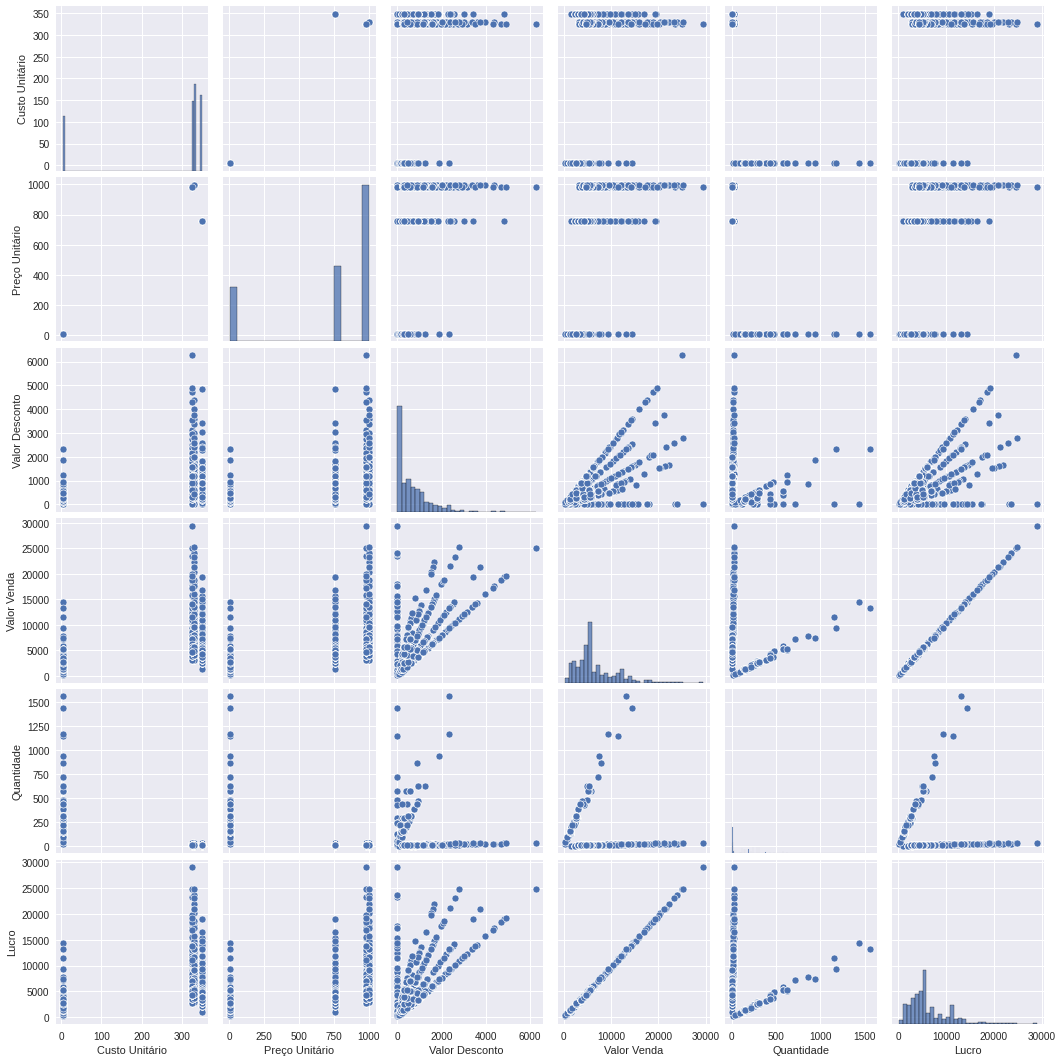

In [ ]:
# Observando a representção vizual dos dados e suas correlações
print(correlação.corr())
sns.pairplot(correlação)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f71b89850>,
      dtype=object)

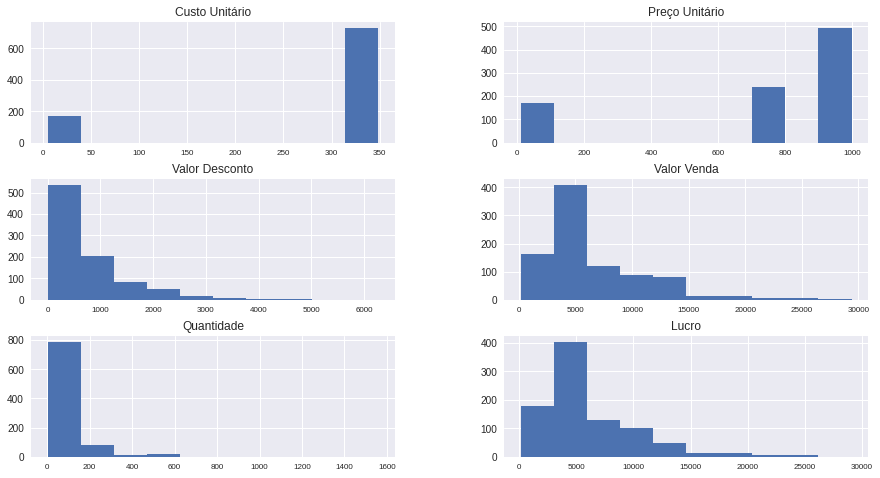

In [ ]:
correlação.hist(figsize = [15,8], xlabelsize = 8)

#### Dados Alterados 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f6e0edd10>,
      dtype=object)

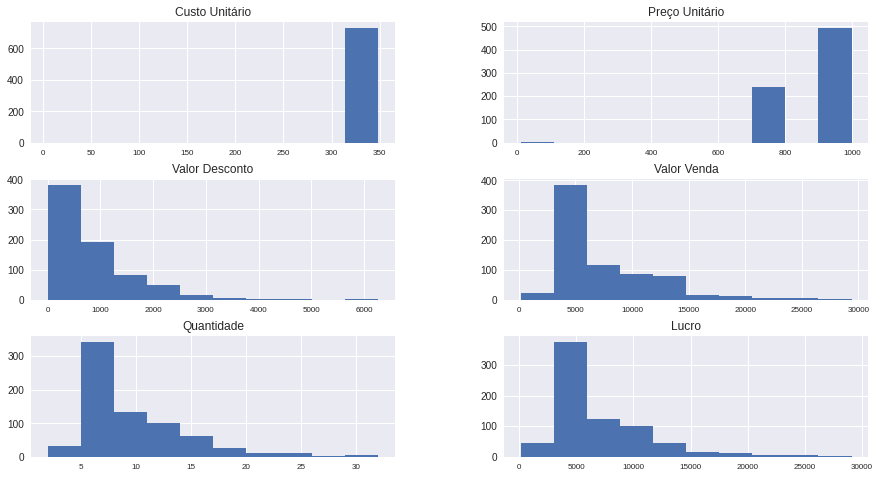

In [ ]:
correlação2 = dados_filtrados[['Custo Unitário', 'Preço Unitário', 'Valor Desconto', 'Valor Venda', 'Quantidade', 'Lucro']]
correlação2.hist(figsize = [15,8], xlabelsize = 8)

                Custo Unitário  Preço Unitário  Valor Desconto  Valor Venda  \
Custo Unitário        1.000000       -0.346287       -0.026176    -0.090171   
Preço Unitário       -0.346287        1.000000        0.082432     0.249889   
Valor Desconto       -0.026176        0.082432        1.000000     0.357406   
Valor Venda          -0.090171        0.249889        0.357406     1.000000   
Quantidade           -0.051054        0.003624        0.512733     0.944356   
Lucro                -0.093902        0.251105        0.357381     0.999993   

                Quantidade     Lucro  
Custo Unitário   -0.051054 -0.093902  
Preço Unitário    0.003624  0.251105  
Valor Desconto    0.512733  0.357381  
Valor Venda       0.944356  0.999993  
Quantidade        1.000000  0.944221  
Lucro             0.944221  1.000000  


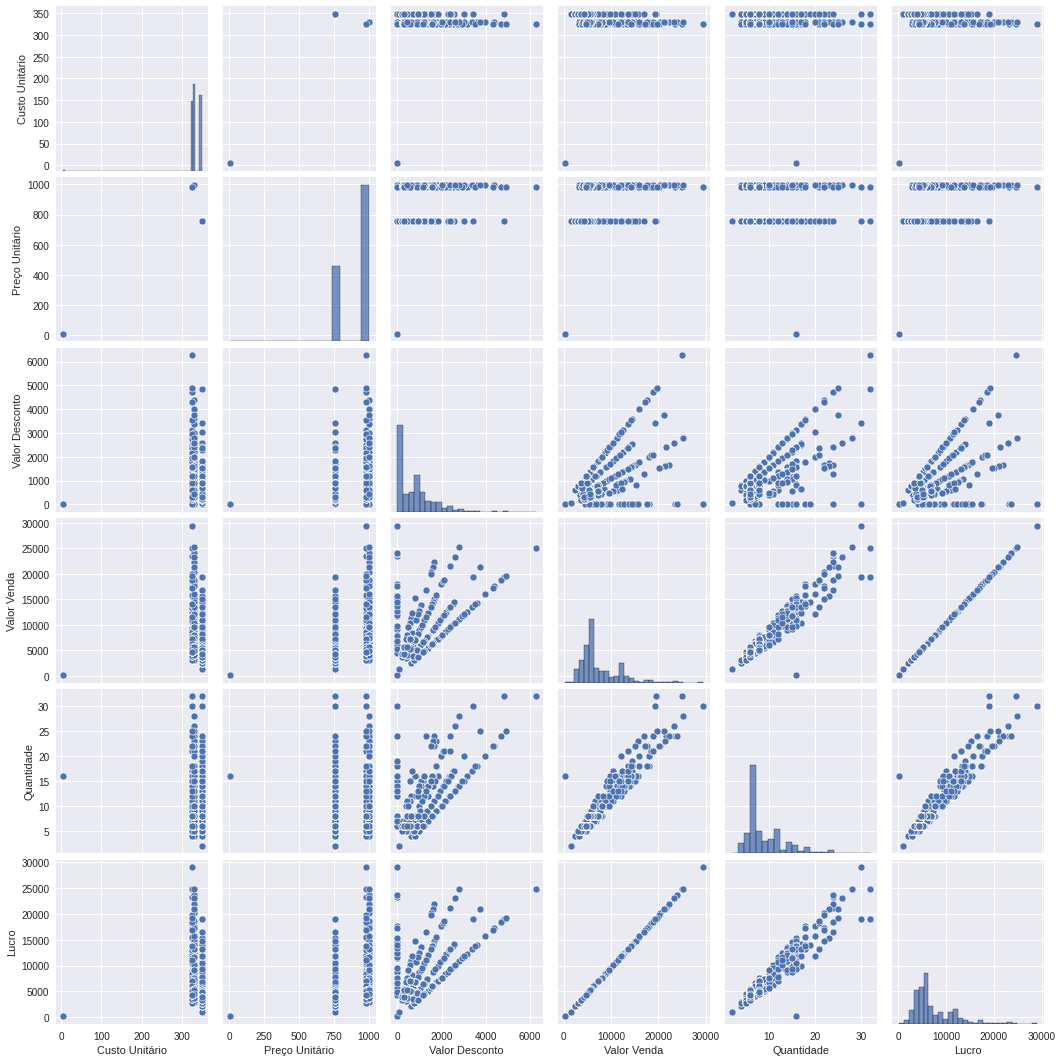

In [ ]:
print(correlação2.corr())
sns.pairplot(correlação2)

#### A variavel Lucro e a variavel quantidade possui uma relação linear, quando os valores discrepantes da quantidade é retirado dos dados

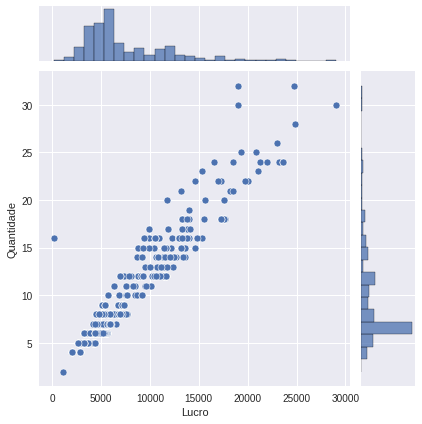

In [ ]:
sns.jointplot(data = correlação2, x ='Lucro', y='Quantidade')

- Neste cenário posso afirmar que os dados possuem relação linear.

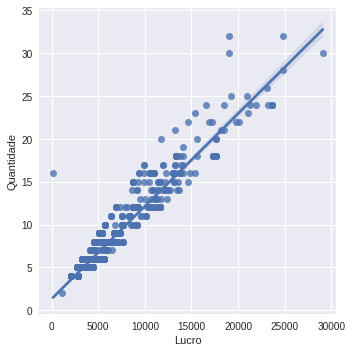

In [ ]:
sns.lmplot(data = correlação2, x ='Lucro', y='Quantidade') 

### Treinamento do modelo

#### Vou realizar uma regressão linear simples, pegando os valore das variaveis Lucro como preditora, e a Quantidade como target a fim de criar um modelo de regressão linear simples.

In [ ]:
X = correlação2['Lucro'].values.reshape(-1,1)
y = correlação2['Quantidade'].values.reshape(-1,1)

#### Fatiando os dados em treino e teste

In [ ]:
from  sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression () #Instanciando o modelo

In [ ]:
lm.fit(X_train, y_train) #Treinando os modelos

LinearRegression()

In [ ]:
print('Coeficientes: \n', lm.coef_, '\n Intercepts: \n', lm.intercept_)

Coeficientes: 
 [[0.00110335]] 
 Intercepts: 
 [1.1784359]


In [ ]:
ypred = lm.predict(X_train) #Realizando as prediçoes

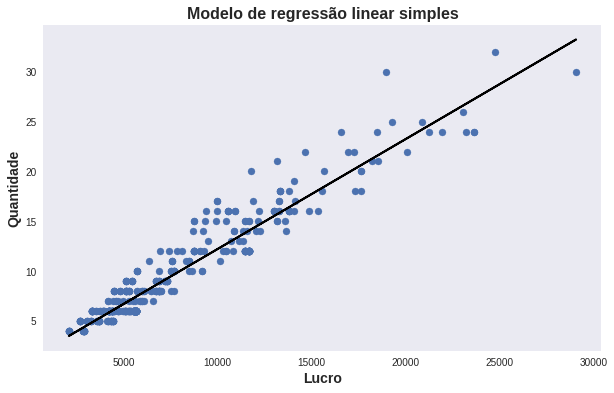

In [ ]:
plt.figure(figsize=[10,6])
plt.title("Modelo de regressão linear simples", fontweight = 'bold', fontsize = 16)
plt.scatter(X_train, y_train)
plt.xlabel("Lucro", fontweight = 'bold', fontsize = 14)
plt.ylabel("Quantidade", fontweight = 'bold', fontsize = 14)
plt.grid()

plt.plot(X_train, ypred, c = 'black', lw = 2)
plt.show()

In [ ]:
# Verificando o erro entre o valor real e o valor predito

# O Rmse funciona como uma métrica para prever o custo do modelo de regressão, 
# ele avalia o valor real e o valor predito e retorna o erro entre eles, sendo 
# possível ver se o modelo teve um bom comportamento.

def RMSE(y, y_pred):
    return np.sqrt(np.mean((y - y_pred)**2))

In [ ]:
RMSE(y = y_train, y_pred = ypred) # RMSE compara o valor real e o valor predito

1.450201614936384

In [ ]:
pred = lm.predict(X_test) #Pegando o valor predito em teste, e vendo se o modelo soube generalizar em dados de teste

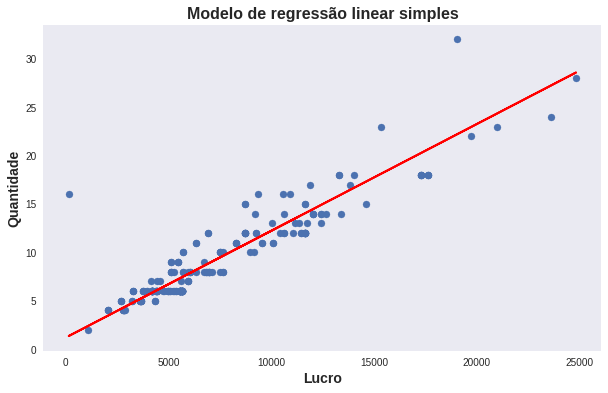

In [ ]:
plt.figure(figsize=[10,6])
plt.title("Modelo de regressão linear simples", fontweight = 'bold', fontsize = 16)
plt.scatter(X_test, y_test)
plt.xlabel("Lucro", fontweight = 'bold', fontsize = 14)
plt.ylabel("Quantidade", fontweight = 'bold', fontsize = 14)
plt.grid()

plt.plot(X_test, pred, c = 'red', lw = 2 )
plt.show()

In [ ]:
RMSE(y = y_test, y_pred = pred) # RMSE compara o valor real e o valor predito

1.844756709778891

italicized text#### Modelo teve um bom resultado

In [ ]:
# Analisando outras metricas
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred)) 
print('MSE:', metrics.mean_squared_error(y_test, pred)) #Erro medio quadratico
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred))) #Raiz do erro medio quadratico

MAE: 1.2201534728668393
MSE: 3.4031273182742394
RMSE: 1.844756709778891


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


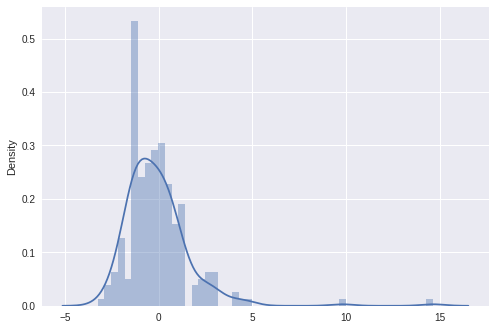

In [ ]:
sns.distplot((y_test-pred),bins=50); # Histograma está bem distribuido

## Conclusão



-  Com a análise realizada podemos tirar algumas conclusões sobre o conjunto de dados, como a variavel Quantidade possui valores atipicos, e quando os dados são balanceados, neste caso geramos um modelo de regressão linear com a veriavel quantidade sem os outliers, demonstrando que a variável Lucro pode ser usada para prever a quantidade que será vendida.

- No cenário de vendas em geral, esse modelo poderia ser usado na análise e perfil de interesse de compra, controle de estoque, média de preço, lucro estimado, e análise  de mercado em geral, possibilitando negociações com fornecedores, caso seja especificado o interesse e a média de compra de cada item.

